<a href="https://colab.research.google.com/github/Milieuuh/detection_masques/blob/main/codetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#On se positionne sur le dossier que l'on veut et clonage de darknet
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4
!git clone https://github.com/AlexeyAB/darknet


/
Mounted at /content/gdrive
/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4
fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
#Edit du makefile et compilation du makefile
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

!/usr/local/cuda/bin/nvcc --version

!make
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_o

In [3]:
# define helper functions

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files

def upload():
  from google.colab import files
  uploaded = files.upload() 

  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  

def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%ls cfg/

yolov4-tiny-custom.cfg


/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x

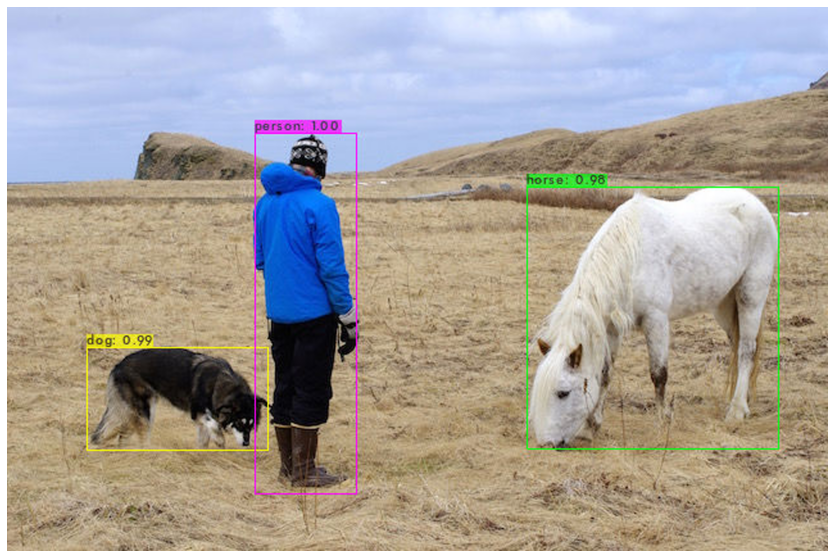

In [ ]:
#Test pour voir si ça marche
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg
imShow('predictions.jpg')

In [ ]:
#Creation du fichier train
import os

for file in os.listdir("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train"):
    if file.endswith(".jpg"):
        fichier = open("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train.txt", "a")
        fichier.write( "/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train/" + file + "\n")
        fichier.close()

In [ ]:
#Creation du fichier test
import os

for file in os.listdir("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test"):
    if file.endswith(".jpg"):
        fichier = open("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test.txt", "a")
        fichier.write( "/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test/" + file + "\n")
        fichier.close()

In [ ]:
#Entrainement
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/
!./darknet detector train data/obj/obj.data yolo-obj.cfg yolov4.conv.137 -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 total_bbox = 26926, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.274346), count: 34, class_loss = 1424.790894, iou_loss = 10.328491, total_loss = 1435.119385 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.405004), count: 31, class_loss = 378.221588, iou_loss = 2.212402, total_loss = 380.433990 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.336421), count: 7, class_loss = 92.905983, iou_loss = 0.122917, total_loss = 93.028900 
 total_bbox = 26998, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.286192), count: 36, class_loss = 1418.041138, iou_loss = 12.873901, total_loss = 1430.915039 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.371526), count: 35, class_loss = 377.941

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

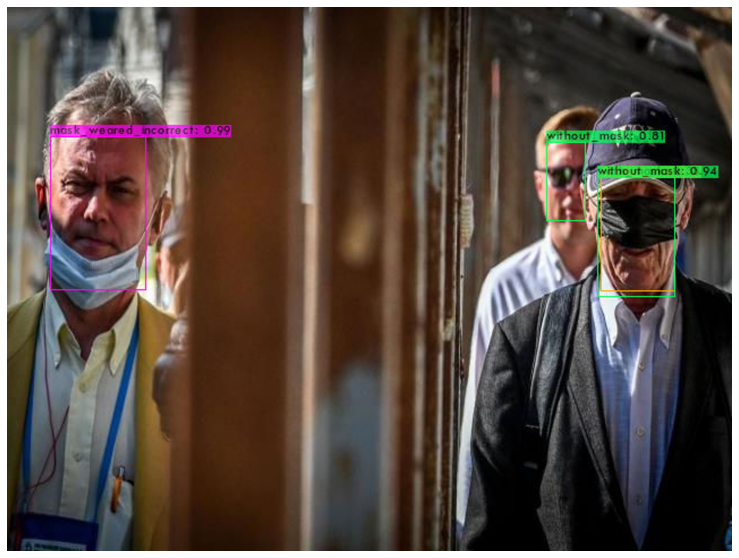

In [11]:
#voir le résultat du premier entrainement
!./darknet detector test data/obj/obj.data yolo-obj.cfg backup/yolo-obj_6000.weights data/obj/test/edb5013d0a9c4338c9f3df7ad3b61dee_jpg_dd4e26f8a6995941febcd2be6c0664c8.jpg

imShow('predictions.jpg')

In [ ]:
#Ligne qui reprend l'entrainement à partir du fichier dans bakcup généré (en génère un au bout de 100 epoch) 
#Au minimum 6000 epoch (3 classes -> 2000 par classes)
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/
!./darknet detector train data/obj/obj.data yolo-obj.cfg backup/yolo-obj_last.weights -dont_show  #reprendre l'entrainement : penser à modifier le nom du fichier des poids


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 total_bbox = 471045, rewritten_bbox = 0.002972 % 

 5926: 1.605540, 1.265600 avg loss, 0.000010 rate, 24.416211 seconds, 379264 images, 0.779004 hours left
Loaded: 0.000078 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.821642), count: 18, class_loss = 0.511030, iou_loss = 81.568604, total_loss = 82.079636 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.833444), count: 12, class_loss = 0.132691, iou_loss = 8.047798, total_loss = 8.180489 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.864357), count: 4, class_loss = 0.005824, iou_loss = 0.402216, total_loss = 0.408040 
 total_bbox = 471079, rewritten_bbox = 0.002972 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.855426), count: 2, class_loss = 0.003293, iou_loss = 1.711291, total_loss = 1.714584 
v3 (iou l